In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Optional: for nicer plots
sns.set(style="whitegrid")


In [3]:
# Load your dataset
df = pd.read_csv("simulated_productivity_dataset.csv")

# Show basic info
print("Dataset preview:")
display(df.head())

print("\nDataset description:")
display(df.describe())


Dataset preview:


,num_commits,issues_resolved,slack_msgs,jira_tickets,team_velocity,productivity_score
0,23,12,67,6,31,20.027724
1,15,8,30,14,22,17.906398
2,21,12,49,11,35,22.360567
3,25,10,51,11,30,25.981019
4,15,15,48,4,39,17.350714



Dataset description:


,num_commits,issues_resolved,slack_msgs,jira_tickets,team_velocity,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,20.026300,9.954300,49.554100,8.020100,29.509200,19.489750
std,4.463564,3.137291,10.016032,2.820867,5.024803,5.502293
min,6.000000,0.000000,7.000000,0.000000,11.000000,0.000000
25%,17.000000,8.000000,43.000000,6.000000,26.000000,15.725198
50%,20.000000,10.000000,50.000000,8.000000,29.000000,19.482483
75%,23.000000,12.000000,56.000000,10.000000,33.000000,23.263712
max,37.000000,25.000000,85.000000,23.000000,49.000000,42.616301


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# If needed (optional):
# df = df.dropna()  # Drop rows with missing values


Missing values per column:
num_commits           0
issues_resolved       0
slack_msgs            0
jira_tickets          0
team_velocity         0
productivity_score    0
dtype: int64


In [5]:
# Define input features and target variable
X = df.drop("productivity_score", axis=1)
y = df["productivity_score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression -- MSE: {mse_lr:.2f}, R^2: {r2_lr:.2f}")


Linear Regression -- MSE: 25.26, R^2: 0.15


In [7]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest (default) -- MSE: {mse_rf:.2f}, R^2: {r2_rf:.2f}")


Random Forest (default) -- MSE: 28.16, R^2: 0.05


<ipython-input-8-08644b5d36df>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="Blues_d")


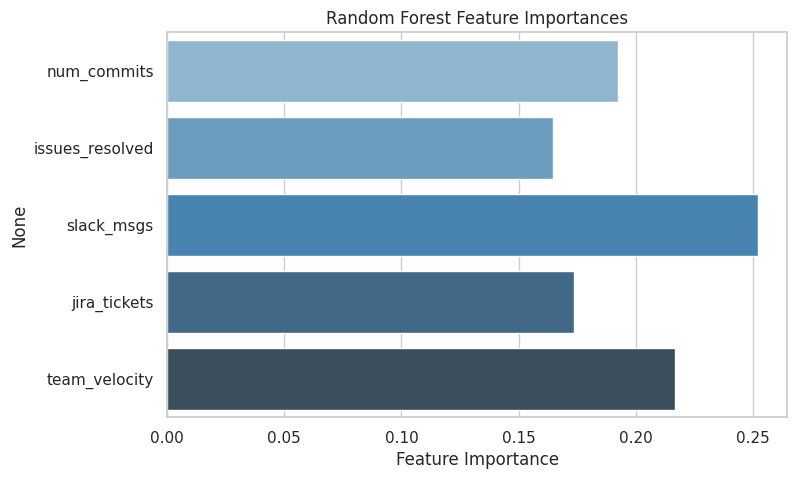

In [8]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, palette="Blues_d")
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()


In [9]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Random Forest (tuned) -- MSE: {mse_best_rf:.2f}, R^2: {r2_best_rf:.2f}")
print("Best RF Parameters:", grid_rf.best_params_)


Random Forest (tuned) -- MSE: 26.26, R^2: 0.11
Best RF Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [10]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting (default) -- MSE: {mse_gb:.2f}, R^2: {r2_gb:.2f}")


Gradient Boosting (default) -- MSE: 25.82, R^2: 0.13


In [11]:
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_gb = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid_gb,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
y_pred_best_gb = best_gb.predict(X_test)

mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print(f"Gradient Boosting (tuned) -- MSE: {mse_best_gb:.2f}, R^2: {r2_best_gb:.2f}")
print("Best GB Parameters:", grid_gb.best_params_)


Gradient Boosting (tuned) -- MSE: 25.76, R^2: 0.13
Best GB Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


<ipython-input-12-fbe859b65665>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mses, ax=ax[0], palette="Reds")
<ipython-input-12-fbe859b65665>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2s, ax=ax[1], palette="Greens")


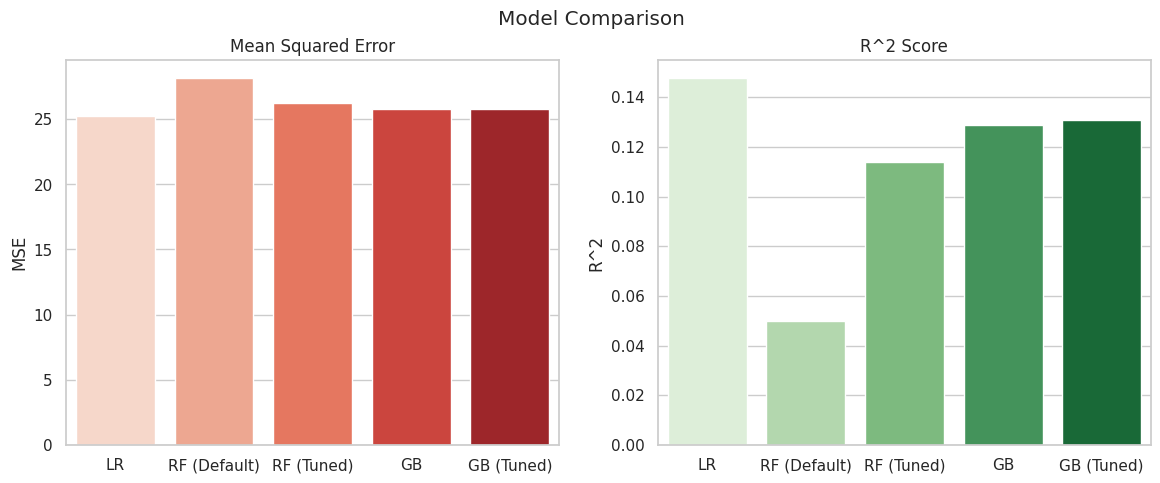

In [12]:
models = ["LR", "RF (Default)", "RF (Tuned)", "GB", "GB (Tuned)"]
mses = [mse_lr, mse_rf, mse_best_rf, mse_gb, mse_best_gb]
r2s = [r2_lr, r2_rf, r2_best_rf, r2_gb, r2_best_gb]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=models, y=mses, ax=ax[0], palette="Reds")
ax[0].set_title("Mean Squared Error")
ax[0].set_ylabel("MSE")

sns.barplot(x=models, y=r2s, ax=ax[1], palette="Greens")
ax[1].set_title("R^2 Score")
ax[1].set_ylabel("R^2")

plt.suptitle("Model Comparison")
plt.show()


In [13]:
# Assuming best model is Linear Regression or update based on evaluation
joblib.dump(lr, "best_productivity_model.pkl")
print("Model saved as best_productivity_model.pkl")


Model saved as best_productivity_model.pkl
